#  Gridsearch em SVC

Explorando `GridSearchCV` no `SVC` para determinar melhor valor de `kernel` e `C` para o classificador no conjunto da iris

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, plot_confusion_matrix

## Preparando dados

In [2]:
irisDS = load_iris()

X, y = load_iris(return_X_y=True)

X_pre_train, X_pre_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)

sc = StandardScaler().fit(X_pre_train)

X_train = sc.transform(X_pre_train)
X_test = sc.transform(X_pre_test)

## GridSearch sobre `kernel`

In [3]:
kernelGS = GridSearchCV(
    estimator=SVC(),
    param_grid={'kernel':['linear', 'poly', 'rbf', 'sigmoid'], 'decision_function_shape':['ovo']}
).fit(
    X_train,
    y_train
)

kernelDF = pd.DataFrame(kernelGS.cv_results_)
kernelDF[['param_kernel', 'mean_test_score', 'std_test_score', 'rank_test_score']]

,param_kernel,mean_test_score,std_test_score,rank_test_score
0,linear,0.980952,0.023328,1
1,poly,0.923810,0.048562,4
2,rbf,0.980952,0.038095,1
3,sigmoid,0.923810,0.064594,3


## GridSearch sobre `C` com kernel `'linear'`

In [4]:
kernelGS = GridSearchCV(
    estimator=SVC(),
    param_grid={'C':np.linspace(0, 1, 25), 'kernel':['linear'], 'decision_function_shape':['ovo']}
).fit(
    X_train,
    y_train
)

cDF = pd.DataFrame(kernelGS.cv_results_)
cDF[['param_C', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values(by='rank_test_score')

,param_C,mean_test_score,std_test_score,rank_test_score
15,0.625,0.990476,0.019048,1
14,0.583333,0.990476,0.019048,1
24,1,0.980952,0.023328,3
16,0.666667,0.980952,0.023328,3
13,0.541667,0.980952,0.023328,3
23,0.958333,0.980952,0.023328,3
19,0.791667,0.980952,0.023328,3
17,0.708333,0.980952,0.023328,3
18,0.75,0.980952,0.023328,3
6,0.25,0.980952,0.038095,3


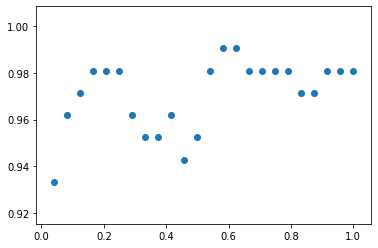

In [11]:
plt.scatter(
    x=cDF[['param_C']],
    y=cDF[['mean_test_score']],
)